In [24]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras as K

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout,Activation
from keras.models import Sequential
from keras.utils import to_categorical

from keras.callbacks import EarlyStopping


from hyperopt import Trials, STATUS_OK, tpe
from keras.utils import np_utils
from hyperas import optim
from hyperas.distributions import choice, uniform




In [54]:
df = pd.read_csv("./kpi.csv", header=0, na_values='.')
df = df[["vinsttillvaxt","omsattningstillvaxt","ebittillvaxt","bruttomarginal","vinstmarginal","operativtkassaflodesmarginal", "stockChangePct"]]
df["stockChangePct"] = df["stockChangePct"].astype(float)
df = df[df["stockChangePct"] < 10000000]
df.stockChangePct = df.stockChangePct * 100

# df = df[df["stockChangePct"] > 10000000]
df["bull"] = np.where((df.stockChangePct> 0), 1, 0)
df = df.dropna()
df = df.drop(columns=["stockChangePct"])

bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
df['vinsttillvaxt'] = pd.cut(df['vinsttillvaxt'], bins=bins, labels=labels)

bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
df['omsattningstillvaxt'] = pd.cut(df['omsattningstillvaxt'], bins=bins, labels=labels)

bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
df['ebittillvaxt'] = pd.cut(df['ebittillvaxt'], bins=bins, labels=labels)

bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
df['bruttomarginal'] = pd.cut(df['bruttomarginal'], bins=bins, labels=labels)

bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
df['vinstmarginal'] = pd.cut(df['vinstmarginal'], bins=bins, labels=labels)

bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
df['operativtkassaflodesmarginal'] = pd.cut(df['operativtkassaflodesmarginal'], bins=bins, labels=labels)

print(df.shape)
print(df.head())


for c in df:
    if c != 'bull':
        unique = df['operativtkassaflodesmarginal'].unique()
        for u in unique:
            df[str(c) + ' ' + str(u)] = np.where((df[c] == u), 1 ,0)

df = df.drop(columns=['vinsttillvaxt', 'omsattningstillvaxt', 'ebittillvaxt', 'bruttomarginal', 'vinstmarginal', 'operativtkassaflodesmarginal'])

# a = pd.DataFrame()
# bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
# labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
# df['stockChangePct'] = pd.cut(df['stockChangePct'], bins=bins, labels=labels)

# # df = df.drop(columns=['stockChangePct'])

# unique = df['stockChangePct'].unique()
# for u in unique:
#     df['stockChangePct' + ' ' + str(u)] = np.where((df["stockChangePct"] == u), 1 ,0)

# df = df.drop(columns=['stockChangePct'])


# plt.figure(figsize=(20, 18))
corr = df.corr()
print()
print(corr["bull"].sort_values(ascending=False))
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
# plt.show()

(2361, 7)
   vinsttillvaxt omsattningstillvaxt ebittillvaxt bruttomarginal  \
29         10-20                0-10        10-20          20-30   
30         10-20                0-10        10-20          20-30   
31         10-20            -10-(-)0         0-10          20-30   
32         20-30                0-10         0-10          20-30   
33         20-30               10-20        10-20          20-30   

   vinstmarginal operativtkassaflodesmarginal  bull  
29          0-10                         0-10     0  
30          0-10                         0-10     0  
31          0-10                     -10-(-)0     1  
32          0-10                        10-20     1  
33          0-10                         0-10     1  

bull                                      1.000000
bruttomarginal 60-70                      0.083059
vinstmarginal >100                        0.080942
vinsttillvaxt 50-60                       0.059707
operativtkassaflodesmarginal 30-40        0.050487
v

In [26]:
# print(df.describe())

In [27]:
def data():
    """
    Data providing function:

    This function is separated from create_model() so that hyperopt
    won't reload data for each evaluation run.
    """
    df = pd.read_csv("./kpi.csv", header=0, na_values='.')
    df = df[["vinsttillvaxt","omsattningstillvaxt","ebittillvaxt","bruttomarginal","vinstmarginal","operativtkassaflodesmarginal", "stockChangePct"]]
    df["stockChangePct"] = df["stockChangePct"].astype(float)
    df = df[df["stockChangePct"] < 10000000]
    df.stockChangePct = df.stockChangePct * 100

    # df = df[df["stockChangePct"] > 10000000]
    # df["bull"] = np.where((df.stockChangePct> 0), 1, 0)
    df = df.dropna()
    # df = df.drop(columns=["stockChangePct"])

    bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
    labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
    df['vinsttillvaxt'] = pd.cut(df['vinsttillvaxt'], bins=bins, labels=labels)

    bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
    labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
    df['omsattningstillvaxt'] = pd.cut(df['omsattningstillvaxt'], bins=bins, labels=labels)

    bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
    labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
    df['ebittillvaxt'] = pd.cut(df['ebittillvaxt'], bins=bins, labels=labels)

    bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
    labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
    df['bruttomarginal'] = pd.cut(df['bruttomarginal'], bins=bins, labels=labels)

    bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
    labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
    df['vinstmarginal'] = pd.cut(df['vinstmarginal'], bins=bins, labels=labels)

    bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
    labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
    df['operativtkassaflodesmarginal'] = pd.cut(df['operativtkassaflodesmarginal'], bins=bins, labels=labels)

    for c in df:
        if c != 'stockChangePct':
            unique = df['operativtkassaflodesmarginal'].unique()
            for u in unique:
                df[str(c) + ' ' + str(u)] = np.where((df[c] == u), 1 ,0)

    df = df.drop(columns=['vinsttillvaxt', 'omsattningstillvaxt', 'ebittillvaxt', 'bruttomarginal', 'vinstmarginal', 'operativtkassaflodesmarginal'])

    a = pd.DataFrame()
    bins = [-100000000,-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000000]
    labels = ['<-100', '-100-(-)90', '-90-(-)80', '-80-(-)70', '-70-(-)60', '-60-(-)50', '-50-(-)40', '-40-(-)30', '-30-(-)20', '-20-(-)10', '-10-(-)0', '0-10',' 10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']
    a['stockChangePct'] = pd.cut(df['stockChangePct'], bins=bins, labels=labels)

    df = df.drop(columns=['stockChangePct'])

    unique = a['stockChangePct'].unique()
    for u in unique:
        a['stockChangePct' + ' ' + str(u)] = np.where((a["stockChangePct"] == u), 1 ,0)

    a = a.drop(columns=['stockChangePct'])
    X = df
    Y = a
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    return x_train, y_train, x_test, y_test

In [28]:
def create_model(x_train, y_train, x_test, y_test):

    """
    Model providing function:

    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    """
    model = Sequential()
    model.add(Dense({{choice([x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3])}}, input_dim=x_train.shape[1]))
    model.add(Activation({{choice(['relu','sigmoid', 'softmax', 'tanh'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3])}}))
    model.add(Activation({{choice(['relu','sigmoid', 'softmax', 'tanh'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3])}}))
    model.add(Activation({{choice(['relu','sigmoid', 'softmax', 'tanh'])}}))
    model.add(Dropout({{uniform(0, 1)}}))


    if {{choice([0, 1])}}:
        model.add(Dense({{choice([x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3])}}))
        model.add(Activation({{choice(['relu','sigmoid', 'softmax', 'tanh'])}}))
        model.add(Dropout({{uniform(0, 1)}}))

    if {{choice([0, 1])}}:
        model.add(Dense({{choice([x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3])}}))
        model.add(Activation({{choice(['relu','sigmoid', 'softmax', 'tanh'])}}))
        model.add(Dropout({{uniform(0, 1)}}))    
    
    model.add(Dense(y_train.shape[1]))
    model.add(Activation('softmax'))
    
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}})

    result = model.fit(x_train, y_train,
                        batch_size={{choice([x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3])}},
                        epochs=50,
                        verbose=2,
                        validation_split=0.1,
                        callbacks=[es])
    
    #get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}




In [29]:
# x_train, y_train, x_test, y_test = data()
# print(x_train.head())
# print(y_train.head())
# print(x_train.shape)
# print(y_train.head())
best_run, best_model = optim.minimize(model=create_model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=100,
                                      notebook_name='Groups2',
                                      trials=Trials())

x_train, y_train, x_test, y_test = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(x_test, y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import keras as K
except:
    pass

try:
    from sklearn.metrics import confusion_matrix, precision_score
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from keras.layers import Dense, Dropout, Activation
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import to_categorical
except:
    pass

try:
    from keras.callbacks import EarlyStopping
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

>>> Hyperas search 

  55: 
Train on 1486 samples, validate on 166 samples                                                                         
Epoch 1/50                                                                                                             
 - 1s - loss: 2.9775 - acc: 0.2207 - val_loss: 2.9531 - val_acc: 0.2169                                                

Epoch 2/50                                                                                                             
 - 0s - loss: 2.9354 - acc: 0.2840 - val_loss: 2.9131 - val_acc: 0.2169                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.8956 - acc: 0.2732 - val_loss: 2.8746 - val_acc: 0.2169                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.8552 - acc: 0.

Epoch 34/50                                                                                                            
 - 0s - loss: 2.0441 - acc: 0.2759 - val_loss: 2.0453 - val_acc: 0.3072                                                

Epoch 35/50                                                                                                            
 - 0s - loss: 2.0346 - acc: 0.2779 - val_loss: 2.0372 - val_acc: 0.3072                                                

Epoch 36/50                                                                                                            
 - 0s - loss: 2.0348 - acc: 0.2840 - val_loss: 2.0304 - val_acc: 0.3072                                                

Epoch 37/50                                                                                                            
 - 0s - loss: 2.0286 - acc: 0.2759 - val_loss: 2.0240 - val_acc: 0.3072                                                

Epoch 38/50                         

 - 0s - loss: 1.8984 - acc: 0.2658 - val_loss: 1.9124 - val_acc: 0.3072                                                

Epoch 17/50                                                                                                            
 - 0s - loss: 1.8945 - acc: 0.2907 - val_loss: 1.9125 - val_acc: 0.3072                                                

Epoch 18/50                                                                                                            
 - 0s - loss: 1.8984 - acc: 0.2948 - val_loss: 1.9126 - val_acc: 0.3072                                                

Epoch 19/50                                                                                                            
 - 0s - loss: 1.8958 - acc: 0.2968 - val_loss: 1.9099 - val_acc: 0.3072                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 1.9107 - acc: 0.2799 -

 - 0s - loss: 2.8637 - acc: 0.2725 - val_loss: 2.8520 - val_acc: 0.2169                                                

Epoch 19/50                                                                                                            
 - 0s - loss: 2.8615 - acc: 0.2409 - val_loss: 2.8459 - val_acc: 0.2169                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 2.8538 - acc: 0.2618 - val_loss: 2.8400 - val_acc: 0.2169                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 2.8311 - acc: 0.2732 - val_loss: 2.8340 - val_acc: 0.2169                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 2.8350 - acc: 0.2631 -

Train on 1486 samples, validate on 166 samples                                                                         
Epoch 1/50                                                                                                             
 - 1s - loss: 2.9893 - acc: 0.1292 - val_loss: 2.9804 - val_acc: 0.1747                                                

Epoch 2/50                                                                                                             
 - 0s - loss: 2.9743 - acc: 0.2180 - val_loss: 2.9653 - val_acc: 0.2169                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.9593 - acc: 0.2059 - val_loss: 2.9503 - val_acc: 0.2169                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.9442 - acc: 0.2046 - 

Epoch 34/50                                                                                                            
 - 0s - loss: 2.5363 - acc: 0.2833 - val_loss: 2.5299 - val_acc: 0.2169                                                

Epoch 35/50                                                                                                            
 - 0s - loss: 2.5269 - acc: 0.2759 - val_loss: 2.5174 - val_acc: 0.2169                                                

Epoch 36/50                                                                                                            
 - 0s - loss: 2.5130 - acc: 0.2793 - val_loss: 2.5052 - val_acc: 0.2169                                                

Epoch 37/50                                                                                                            
 - 0s - loss: 2.4995 - acc: 0.2934 - val_loss: 2.4931 - val_acc: 0.2169                                                

Epoch 38/50                         

 - 0s - loss: 1.8850 - acc: 0.2981 - val_loss: 1.9084 - val_acc: 0.3072                                                

Epoch 17/50                                                                                                            
 - 0s - loss: 1.8891 - acc: 0.2853 - val_loss: 1.9150 - val_acc: 0.2169                                                

Epoch 18/50                                                                                                            
 - 0s - loss: 1.8860 - acc: 0.2887 - val_loss: 1.9122 - val_acc: 0.3072                                                

Epoch 19/50                                                                                                            
 - 0s - loss: 1.8833 - acc: 0.2867 - val_loss: 1.9132 - val_acc: 0.3072                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 1.8944 - acc: 0.2752 -

 - 0s - loss: 2.0016 - acc: 0.2685 - val_loss: 1.9452 - val_acc: 0.2169                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.9917 - acc: 0.2813 - val_loss: 1.9397 - val_acc: 0.2169                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 1.9531 - acc: 0.2927 - val_loss: 1.9290 - val_acc: 0.3072                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 1.9752 - acc: 0.2705 - val_loss: 1.9252 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.9786 - acc: 0.2712 -

 - 0s - loss: 2.9184 - acc: 0.2927 - val_loss: 2.9114 - val_acc: 0.3072                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 2.9010 - acc: 0.2900 - val_loss: 2.8949 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 2.8839 - acc: 0.2806 - val_loss: 2.8786 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 2.8671 - acc: 0.2927 - val_loss: 2.8625 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 2.8510 - acc: 0.2847 -

Epoch 39/50                                                                                                            
 - 0s - loss: 2.4591 - acc: 0.2907 - val_loss: 2.4741 - val_acc: 0.3072                                                

Epoch 40/50                                                                                                            
 - 0s - loss: 2.4496 - acc: 0.2907 - val_loss: 2.4650 - val_acc: 0.3072                                                

Epoch 41/50                                                                                                            
 - 0s - loss: 2.4400 - acc: 0.2907 - val_loss: 2.4562 - val_acc: 0.3072                                                

Epoch 42/50                                                                                                            
 - 0s - loss: 2.4305 - acc: 0.2907 - val_loss: 2.4476 - val_acc: 0.3072                                                

Epoch 43/50                         

 - 0s - loss: 2.0072 - acc: 0.2678 - val_loss: 1.9589 - val_acc: 0.2169                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9825 - acc: 0.2725 - val_loss: 1.9384 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9559 - acc: 0.2773 - val_loss: 1.9288 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.9390 - acc: 0.2867 - val_loss: 1.9213 - val_acc: 0.3072                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 1.9440 - acc: 0.2820 -

Epoch 40/50                                                                                                            
 - 0s - loss: 1.8885 - acc: 0.2981 - val_loss: 1.9023 - val_acc: 0.2711                                                

Epoch 41/50                                                                                                            
 - 0s - loss: 1.8750 - acc: 0.3082 - val_loss: 1.9043 - val_acc: 0.2651                                                

Epoch 42/50                                                                                                            
 - 0s - loss: 1.8890 - acc: 0.3096 - val_loss: 1.9039 - val_acc: 0.2831                                                

Epoch 43/50                                                                                                            
 - 0s - loss: 1.8955 - acc: 0.3028 - val_loss: 1.9071 - val_acc: 0.2651                                                

Epoch 44/50                         

Epoch 22/50                                                                                                            
 - 0s - loss: 1.8856 - acc: 0.2900 - val_loss: 1.9066 - val_acc: 0.3072                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 1.8858 - acc: 0.3096 - val_loss: 1.9082 - val_acc: 0.3072                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 1.8913 - acc: 0.2624 - val_loss: 1.9085 - val_acc: 0.3072                                                

Epoch 25/50                                                                                                            
 - 0s - loss: 1.8815 - acc: 0.2820 - val_loss: 1.9084 - val_acc: 0.3072                                                

Epoch 26/50                         

Epoch 24/50                                                                                                            
 - 0s - loss: 1.9927 - acc: 0.2820 - val_loss: 1.9004 - val_acc: 0.3072                                                

Epoch 25/50                                                                                                            
 - 0s - loss: 1.9801 - acc: 0.2739 - val_loss: 1.8966 - val_acc: 0.3072                                                

Epoch 26/50                                                                                                            
 - 0s - loss: 1.9963 - acc: 0.2699 - val_loss: 1.8930 - val_acc: 0.3072                                                

Epoch 27/50                                                                                                            
 - 0s - loss: 1.9732 - acc: 0.2732 - val_loss: 1.8899 - val_acc: 0.3072                                                

Epoch 28/50                         

 - 0s - loss: 2.2369 - acc: 0.2463 - val_loss: 1.9317 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 2.2642 - acc: 0.2328 - val_loss: 1.9269 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 2.2652 - acc: 0.2389 - val_loss: 1.9165 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 2.1936 - acc: 0.2631 - val_loss: 1.9165 - val_acc: 0.3072                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 2.1996 - acc: 0.2524 -

 - 0s - loss: 2.0681 - acc: 0.2342 - val_loss: 2.0076 - val_acc: 0.3072                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 2.0391 - acc: 0.2699 - val_loss: 1.9578 - val_acc: 0.3072                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 1.9408 - acc: 0.2719 - val_loss: 1.9838 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 1.9366 - acc: 0.2867 - val_loss: 1.9629 - val_acc: 0.1747                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 2.0092 - acc: 0.2510 -

 - 0s - loss: 2.6231 - acc: 0.2799 - val_loss: 2.6182 - val_acc: 0.3072                                                

Epoch 29/50                                                                                                            
 - 0s - loss: 2.6129 - acc: 0.3001 - val_loss: 2.6068 - val_acc: 0.3072                                                

Epoch 30/50                                                                                                            
 - 0s - loss: 2.6009 - acc: 0.2732 - val_loss: 2.5956 - val_acc: 0.3072                                                

Epoch 31/50                                                                                                            
 - 0s - loss: 2.5893 - acc: 0.2894 - val_loss: 2.5845 - val_acc: 0.3072                                                

Epoch 32/50                                                                                                            
 - 0s - loss: 2.5786 - acc: 0.2847 -

Epoch 11/50                                                                                                            
 - 0s - loss: 2.4388 - acc: 0.2295 - val_loss: 2.1235 - val_acc: 0.2169                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 2.3837 - acc: 0.2692 - val_loss: 2.1052 - val_acc: 0.3072                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 2.3331 - acc: 0.2618 - val_loss: 2.0687 - val_acc: 0.2169                                                

Epoch 14/50                                                                                                            
 - 0s - loss: 2.3035 - acc: 0.2577 - val_loss: 2.0553 - val_acc: 0.2169                                                

Epoch 15/50                         

 - 0s - loss: 2.0940 - acc: 0.2773 - val_loss: 1.9130 - val_acc: 0.3072                                                

Epoch 45/50                                                                                                            
 - 0s - loss: 2.0515 - acc: 0.2887 - val_loss: 1.9112 - val_acc: 0.3072                                                

Epoch 46/50                                                                                                            
 - 0s - loss: 2.0331 - acc: 0.2914 - val_loss: 1.9088 - val_acc: 0.3072                                                

Epoch 47/50                                                                                                            
 - 0s - loss: 2.0506 - acc: 0.2799 - val_loss: 1.9094 - val_acc: 0.3072                                                

Epoch 48/50                                                                                                            
 - 0s - loss: 2.0313 - acc: 0.2887 -

Epoch 9/50                                                                                                             
 - 0s - loss: 2.2736 - acc: 0.2436 - val_loss: 2.0641 - val_acc: 0.3072                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 2.2706 - acc: 0.2429 - val_loss: 2.0590 - val_acc: 0.3072                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 2.2386 - acc: 0.2409 - val_loss: 2.0461 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 2.2135 - acc: 0.2699 - val_loss: 1.9994 - val_acc: 0.3072                                                

Epoch 13/50                         

 - 0s - loss: 1.9971 - acc: 0.2725 - val_loss: 1.9680 - val_acc: 0.3072                                                

Epoch 43/50                                                                                                            
 - 0s - loss: 2.0019 - acc: 0.2759 - val_loss: 1.9311 - val_acc: 0.3072                                                

Epoch 44/50                                                                                                            
 - 0s - loss: 2.0225 - acc: 0.2773 - val_loss: 2.0795 - val_acc: 0.3072                                                

Epoch 45/50                                                                                                            
 - 0s - loss: 1.9826 - acc: 0.2732 - val_loss: 1.9598 - val_acc: 0.3072                                                

Epoch 46/50                                                                                                            
 - 0s - loss: 1.9837 - acc: 0.2705 -

Epoch 5/50                                                                                                             
 - 0s - loss: 2.1991 - acc: 0.2773 - val_loss: 2.0407 - val_acc: 0.3072                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 1.9942 - acc: 0.2732 - val_loss: 1.9532 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9732 - acc: 0.2948 - val_loss: 1.9800 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9745 - acc: 0.2894 - val_loss: 1.9632 - val_acc: 0.2169                                                

Epoch 9/50                          

Epoch 17/50                                                                                                            
 - 0s - loss: 1.7909 - acc: 0.3311 - val_loss: 1.9082 - val_acc: 0.3313                                                

Epoch 18/50                                                                                                            
 - 0s - loss: 1.8020 - acc: 0.3331 - val_loss: 1.9028 - val_acc: 0.3434                                                

Epoch 00018: early stopping                                                                                            
Best validation acc of epoch:                                                                                          
0.3614457860050431                                                                                                     
Train on 1486 samples, validate on 166 samples                                                                         
Epoch 1/50                            

Epoch 9/50                                                                                                             
 - 0s - loss: 1.8971 - acc: 0.2907 - val_loss: 1.9000 - val_acc: 0.2892                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 1.8878 - acc: 0.2921 - val_loss: 1.9004 - val_acc: 0.3253                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 1.8604 - acc: 0.3096 - val_loss: 1.9045 - val_acc: 0.2952                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.8630 - acc: 0.2948 - val_loss: 1.9080 - val_acc: 0.3253                                                

Epoch 13/50                         

Epoch 23/50                                                                                                            
 - 0s - loss: 1.9272 - acc: 0.2692 - val_loss: 1.9066 - val_acc: 0.3072                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 1.9326 - acc: 0.2530 - val_loss: 1.9127 - val_acc: 0.2530                                                

Epoch 25/50                                                                                                            
 - 0s - loss: 1.9206 - acc: 0.2853 - val_loss: 1.9111 - val_acc: 0.3012                                                

Epoch 26/50                                                                                                            
 - 0s - loss: 1.9158 - acc: 0.2813 - val_loss: 1.9134 - val_acc: 0.2108                                                

Epoch 27/50                         

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9362 - acc: 0.2685 - val_loss: 1.8964 - val_acc: 0.3253                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.8978 - acc: 0.2840 - val_loss: 1.8910 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.8977 - acc: 0.2867 - val_loss: 1.8920 - val_acc: 0.3373                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 1.9176 - acc: 0.2887 - val_loss: 1.8943 - val_acc: 0.3193                                                

Epoch 11/50                         

Epoch 1/50                                                                                                             
 - 3s - loss: 3.1040 - acc: 0.0754 - val_loss: 2.0626 - val_acc: 0.3133                                                

Epoch 2/50                                                                                                             
 - 0s - loss: 2.0914 - acc: 0.2463 - val_loss: 2.0122 - val_acc: 0.3072                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.0221 - acc: 0.2631 - val_loss: 1.9226 - val_acc: 0.2410                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.0169 - acc: 0.2409 - val_loss: 1.9101 - val_acc: 0.3072                                                

Epoch 5/50                          

Epoch 10/50                                                                                                            
 - 0s - loss: 1.9163 - acc: 0.3028 - val_loss: 1.9167 - val_acc: 0.3253                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 1.9275 - acc: 0.2746 - val_loss: 1.9144 - val_acc: 0.3133                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.9098 - acc: 0.2867 - val_loss: 1.9092 - val_acc: 0.3072                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 1.9175 - acc: 0.2685 - val_loss: 1.9167 - val_acc: 0.2108                                                

Epoch 14/50                         

Epoch 5/50                                                                                                             
 - 0s - loss: 1.9637 - acc: 0.2793 - val_loss: 1.9084 - val_acc: 0.3012                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 1.9635 - acc: 0.2678 - val_loss: 1.9035 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9513 - acc: 0.2793 - val_loss: 1.9028 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9298 - acc: 0.2732 - val_loss: 1.9008 - val_acc: 0.3012                                                

Epoch 9/50                          

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9594 - acc: 0.2685 - val_loss: 1.9235 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.9353 - acc: 0.2934 - val_loss: 1.9155 - val_acc: 0.3072                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 1.9484 - acc: 0.2766 - val_loss: 1.9136 - val_acc: 0.3072                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 1.9427 - acc: 0.2739 - val_loss: 1.9216 - val_acc: 0.2169                                                

Epoch 12/50                         

Epoch 6/50                                                                                                             
 - 0s - loss: 1.8534 - acc: 0.3096 - val_loss: 1.8834 - val_acc: 0.3373                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.8336 - acc: 0.3324 - val_loss: 1.8829 - val_acc: 0.3193                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.8055 - acc: 0.3425 - val_loss: 1.8893 - val_acc: 0.3373                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.8175 - acc: 0.3250 - val_loss: 1.8826 - val_acc: 0.3193                                                

Epoch 10/50                         

Epoch 19/50                                                                                                            
 - 0s - loss: 1.9470 - acc: 0.2820 - val_loss: 1.9058 - val_acc: 0.3072                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 1.9036 - acc: 0.2974 - val_loss: 1.9034 - val_acc: 0.3072                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 1.9240 - acc: 0.2699 - val_loss: 1.9007 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 1.9186 - acc: 0.2853 - val_loss: 1.9013 - val_acc: 0.3072                                                

Epoch 23/50                         

Epoch 6/50                                                                                                             
 - 0s - loss: 1.9202 - acc: 0.2584 - val_loss: 1.8864 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9030 - acc: 0.2873 - val_loss: 1.8884 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9167 - acc: 0.2806 - val_loss: 1.8895 - val_acc: 0.3133                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.8830 - acc: 0.2793 - val_loss: 1.8755 - val_acc: 0.3072                                                

Epoch 10/50                         

Epoch 7/50                                                                                                             
 - 0s - loss: 2.2021 - acc: 0.2423 - val_loss: 1.9146 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 2.1291 - acc: 0.2476 - val_loss: 1.9184 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 2.0583 - acc: 0.2658 - val_loss: 1.9252 - val_acc: 0.3072                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 2.0285 - acc: 0.2530 - val_loss: 1.9280 - val_acc: 0.3072                                                

Epoch 11/50                         

Epoch 23/50                                                                                                            
 - 0s - loss: 1.9649 - acc: 0.2820 - val_loss: 1.9138 - val_acc: 0.2831                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 1.9564 - acc: 0.2941 - val_loss: 1.9126 - val_acc: 0.3012                                                

Epoch 25/50                                                                                                            
 - 0s - loss: 1.9755 - acc: 0.2685 - val_loss: 1.9113 - val_acc: 0.2711                                                

Epoch 26/50                                                                                                            
 - 0s - loss: 1.9522 - acc: 0.2658 - val_loss: 1.9116 - val_acc: 0.3012                                                

Epoch 27/50                         

 - 0s - loss: 2.0080 - acc: 0.2571 - val_loss: 1.9744 - val_acc: 0.3193                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 2.0079 - acc: 0.2584 - val_loss: 1.9639 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9863 - acc: 0.2725 - val_loss: 1.9617 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9938 - acc: 0.2537 - val_loss: 1.9543 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.9747 - acc: 0.2773 -

Epoch 39/50                                                                                                            
 - 0s - loss: 1.9288 - acc: 0.2672 - val_loss: 1.9109 - val_acc: 0.3072                                                

Epoch 40/50                                                                                                            
 - 0s - loss: 1.9135 - acc: 0.2719 - val_loss: 1.9163 - val_acc: 0.3012                                                

Epoch 41/50                                                                                                            
 - 0s - loss: 1.8939 - acc: 0.2773 - val_loss: 1.9128 - val_acc: 0.3072                                                

Epoch 42/50                                                                                                            
 - 0s - loss: 1.9011 - acc: 0.2981 - val_loss: 1.9141 - val_acc: 0.2410                                                

Epoch 43/50                         

Epoch 24/50                                                                                                            
 - 0s - loss: 1.8057 - acc: 0.3048 - val_loss: 1.8722 - val_acc: 0.3072                                                

Epoch 25/50                                                                                                            
 - 0s - loss: 1.8079 - acc: 0.2921 - val_loss: 1.8774 - val_acc: 0.2952                                                

Epoch 26/50                                                                                                            
 - 0s - loss: 1.7862 - acc: 0.3042 - val_loss: 1.8653 - val_acc: 0.3012                                                

Epoch 27/50                                                                                                            
 - 0s - loss: 1.7955 - acc: 0.2995 - val_loss: 1.8781 - val_acc: 0.3012                                                

Epoch 28/50                         

Epoch 20/50                                                                                                            
 - 0s - loss: 2.8794 - acc: 0.2907 - val_loss: 2.8795 - val_acc: 0.3072                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 2.8739 - acc: 0.2914 - val_loss: 2.8741 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 2.8681 - acc: 0.2907 - val_loss: 2.8687 - val_acc: 0.3072                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 2.8627 - acc: 0.2907 - val_loss: 2.8634 - val_acc: 0.3072                                                

Epoch 24/50                         

 - 0s - loss: 1.9854 - acc: 0.2759 - val_loss: 1.9578 - val_acc: 0.3072                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 1.9259 - acc: 0.3035 - val_loss: 1.9077 - val_acc: 0.3072                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 1.9166 - acc: 0.2766 - val_loss: 1.9146 - val_acc: 0.2169                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 1.9024 - acc: 0.2914 - val_loss: 1.9237 - val_acc: 0.3072                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 1.8956 - acc: 0.2806 -

 - 0s - loss: 1.8183 - acc: 0.3028 - val_loss: 1.8867 - val_acc: 0.3373                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 1.8050 - acc: 0.3324 - val_loss: 1.8840 - val_acc: 0.3253                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 1.7999 - acc: 0.3392 - val_loss: 1.8816 - val_acc: 0.3434                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 1.7975 - acc: 0.3324 - val_loss: 1.8887 - val_acc: 0.3012                                                

Epoch 25/50                                                                                                            
 - 0s - loss: 1.7924 - acc: 0.3466 -

 - 0s - loss: 1.9366 - acc: 0.2806 - val_loss: 2.3732 - val_acc: 0.3012                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.8969 - acc: 0.2766 - val_loss: 2.3688 - val_acc: 0.2470                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9009 - acc: 0.2880 - val_loss: 2.3317 - val_acc: 0.2470                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.9054 - acc: 0.2786 - val_loss: 2.3228 - val_acc: 0.3253                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 1.9173 - acc: 0.2739 -

 - 0s - loss: 2.7715 - acc: 0.2907 - val_loss: 2.7751 - val_acc: 0.3072                                                

Epoch 28/50                                                                                                            
 - 0s - loss: 2.7635 - acc: 0.2907 - val_loss: 2.7678 - val_acc: 0.3072                                                

Epoch 29/50                                                                                                            
 - 0s - loss: 2.7561 - acc: 0.2907 - val_loss: 2.7606 - val_acc: 0.3072                                                

Epoch 30/50                                                                                                            
 - 0s - loss: 2.7487 - acc: 0.2907 - val_loss: 2.7533 - val_acc: 0.3072                                                

Epoch 31/50                                                                                                            
 - 0s - loss: 2.7412 - acc: 0.2907 -

Epoch 10/50                                                                                                            
 - 0s - loss: 2.6147 - acc: 0.2106 - val_loss: 2.5794 - val_acc: 0.1386                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 2.5987 - acc: 0.2093 - val_loss: 2.5561 - val_acc: 0.1386                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 2.5726 - acc: 0.2093 - val_loss: 2.5337 - val_acc: 0.2169                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 2.5477 - acc: 0.2147 - val_loss: 2.5093 - val_acc: 0.2169                                                

Epoch 14/50                         

 - 0s - loss: 2.2034 - acc: 0.2914 - val_loss: 2.1323 - val_acc: 0.3072                                                

Epoch 44/50                                                                                                            
 - 0s - loss: 2.2101 - acc: 0.2900 - val_loss: 2.1259 - val_acc: 0.3072                                                

Epoch 45/50                                                                                                            
 - 0s - loss: 2.1865 - acc: 0.2799 - val_loss: 2.1196 - val_acc: 0.3072                                                

Epoch 46/50                                                                                                            
 - 0s - loss: 2.2096 - acc: 0.2847 - val_loss: 2.1133 - val_acc: 0.3072                                                

Epoch 47/50                                                                                                            
 - 0s - loss: 2.2017 - acc: 0.2907 -

Epoch 2/50                                                                                                             
 - 0s - loss: 2.9046 - acc: 0.2672 - val_loss: 2.8540 - val_acc: 0.2169                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.8072 - acc: 0.2826 - val_loss: 2.7401 - val_acc: 0.2169                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.6785 - acc: 0.2799 - val_loss: 2.6028 - val_acc: 0.2169                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 2.5428 - acc: 0.2766 - val_loss: 2.4582 - val_acc: 0.2169                                                

Epoch 6/50                          

Epoch 1/50                                                                                                             
 - 6s - loss: 2.6541 - acc: 0.2133 - val_loss: 2.0271 - val_acc: 0.2169                                                

Epoch 2/50                                                                                                             
 - 0s - loss: 2.4111 - acc: 0.2409 - val_loss: 2.0125 - val_acc: 0.2048                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.3079 - acc: 0.2396 - val_loss: 2.0372 - val_acc: 0.3072                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.3167 - acc: 0.2275 - val_loss: 1.9398 - val_acc: 0.2831                                                

Epoch 5/50                          

 - 0s - loss: 1.9036 - acc: 0.3001 - val_loss: 1.8988 - val_acc: 0.3313                                                

Epoch 35/50                                                                                                            
 - 0s - loss: 1.8881 - acc: 0.2961 - val_loss: 1.9111 - val_acc: 0.3373                                                

Epoch 36/50                                                                                                            
 - 0s - loss: 1.8783 - acc: 0.2779 - val_loss: 1.8969 - val_acc: 0.3373                                                

Epoch 37/50                                                                                                            
 - 0s - loss: 1.8948 - acc: 0.2645 - val_loss: 1.9048 - val_acc: 0.3434                                                

Epoch 38/50                                                                                                            
 - 0s - loss: 1.8923 - acc: 0.2941 -

 - 0s - loss: 2.6749 - acc: 0.2853 - val_loss: 2.6078 - val_acc: 0.3072                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 2.6599 - acc: 0.2833 - val_loss: 2.5924 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 2.6450 - acc: 0.2914 - val_loss: 2.5739 - val_acc: 0.3072                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 2.6318 - acc: 0.2941 - val_loss: 2.5604 - val_acc: 0.3072                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 2.6161 - acc: 0.2860 -

Epoch 3/50                                                                                                             
 - 0s - loss: 2.9724 - acc: 0.1999 - val_loss: 2.9659 - val_acc: 0.2169                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.9621 - acc: 0.2012 - val_loss: 2.9558 - val_acc: 0.2169                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 2.9525 - acc: 0.2113 - val_loss: 2.9458 - val_acc: 0.2169                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 2.9415 - acc: 0.2355 - val_loss: 2.9356 - val_acc: 0.2169                                                

Epoch 7/50                          

 - 0s - loss: 2.5710 - acc: 0.2988 - val_loss: 2.5527 - val_acc: 0.3072                                                

Epoch 37/50                                                                                                            
 - 0s - loss: 2.5596 - acc: 0.2786 - val_loss: 2.5430 - val_acc: 0.3072                                                

Epoch 38/50                                                                                                            
 - 0s - loss: 2.5495 - acc: 0.2954 - val_loss: 2.5337 - val_acc: 0.3072                                                

Epoch 39/50                                                                                                            
 - 0s - loss: 2.5410 - acc: 0.2813 - val_loss: 2.5247 - val_acc: 0.3072                                                

Epoch 40/50                                                                                                            
 - 0s - loss: 2.5281 - acc: 0.2974 -

Epoch 19/50                                                                                                            
 - 0s - loss: 1.9074 - acc: 0.2853 - val_loss: 1.9076 - val_acc: 0.3072                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 1.9043 - acc: 0.2826 - val_loss: 1.9104 - val_acc: 0.2169                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 1.9172 - acc: 0.2867 - val_loss: 1.9070 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 1.9024 - acc: 0.2826 - val_loss: 1.9037 - val_acc: 0.3072                                                

Epoch 23/50                         

Epoch 5/50                                                                                                             
 - 0s - loss: 1.9876 - acc: 0.2719 - val_loss: 1.9106 - val_acc: 0.3133                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 1.9771 - acc: 0.2577 - val_loss: 1.8935 - val_acc: 0.3253                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9566 - acc: 0.2773 - val_loss: 1.8934 - val_acc: 0.3133                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9397 - acc: 0.3042 - val_loss: 1.9040 - val_acc: 0.3313                                                

Epoch 9/50                          

Epoch 7/50                                                                                                             
 - 0s - loss: 2.0878 - acc: 0.2443 - val_loss: 2.0530 - val_acc: 0.2169                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 2.0767 - acc: 0.2443 - val_loss: 2.0109 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 2.0411 - acc: 0.2544 - val_loss: 2.0602 - val_acc: 0.2169                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 2.0141 - acc: 0.2524 - val_loss: 2.0058 - val_acc: 0.3072                                                

Epoch 11/50                         

Epoch 7/50                                                                                                             
 - 0s - loss: 2.2931 - acc: 0.2517 - val_loss: 2.5194 - val_acc: 0.2169                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 2.2484 - acc: 0.2624 - val_loss: 2.4436 - val_acc: 0.2169                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 2.2111 - acc: 0.2416 - val_loss: 2.4289 - val_acc: 0.2169                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 2.2180 - acc: 0.2779 - val_loss: 2.2953 - val_acc: 0.2169                                                

Epoch 11/50                         

Epoch 19/50                                                                                                            
 - 0s - loss: 2.4592 - acc: 0.2813 - val_loss: 2.3976 - val_acc: 0.3072                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 2.4380 - acc: 0.2833 - val_loss: 2.3819 - val_acc: 0.3072                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 2.4464 - acc: 0.2712 - val_loss: 2.3669 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 2.4148 - acc: 0.2954 - val_loss: 2.3523 - val_acc: 0.3072                                                

Epoch 23/50                         

 - 6s - loss: 2.3696 - acc: 0.2490 - val_loss: 2.0072 - val_acc: 0.2831                                                

Epoch 2/50                                                                                                             
 - 0s - loss: 1.9012 - acc: 0.2900 - val_loss: 1.8813 - val_acc: 0.3253                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 1.8193 - acc: 0.3284 - val_loss: 1.8772 - val_acc: 0.3253                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 1.7686 - acc: 0.3392 - val_loss: 1.8672 - val_acc: 0.3313                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 1.7421 - acc: 0.3425 -

 - 0s - loss: 2.8367 - acc: 0.2907 - val_loss: 2.8379 - val_acc: 0.3072                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 2.8286 - acc: 0.2907 - val_loss: 2.8301 - val_acc: 0.3072                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 2.8205 - acc: 0.2907 - val_loss: 2.8224 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 2.8125 - acc: 0.2907 - val_loss: 2.8147 - val_acc: 0.3072                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 2.8046 - acc: 0.2907 -

Epoch 2/50                                                                                                             
 - 0s - loss: 2.3558 - acc: 0.2221 - val_loss: 2.0955 - val_acc: 0.2169                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.3510 - acc: 0.2227 - val_loss: 1.9869 - val_acc: 0.2289                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.2845 - acc: 0.2416 - val_loss: 1.9692 - val_acc: 0.2169                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 2.2426 - acc: 0.2443 - val_loss: 1.9447 - val_acc: 0.2169                                                

Epoch 6/50                          

Epoch 5/50                                                                                                             
 - 0s - loss: 2.0093 - acc: 0.2725 - val_loss: 1.9045 - val_acc: 0.3012                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 2.0125 - acc: 0.2631 - val_loss: 1.8926 - val_acc: 0.2952                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9554 - acc: 0.2773 - val_loss: 1.9117 - val_acc: 0.2349                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9657 - acc: 0.2786 - val_loss: 1.8981 - val_acc: 0.3072                                                

Epoch 9/50                          

Best validation acc of epoch:                                                                                          
0.34337350726127625                                                                                                    
Train on 1486 samples, validate on 166 samples                                                                         
Epoch 1/50                                                                                                             
 - 6s - loss: 2.9330 - acc: 0.2436 - val_loss: 2.8182 - val_acc: 0.3072                                                

Epoch 2/50                                                                                                             
 - 0s - loss: 2.6252 - acc: 0.2853 - val_loss: 2.3170 - val_acc: 0.3072                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.0894 - acc: 0.2766 - v

 - 0s - loss: 1.8908 - acc: 0.2820 - val_loss: 1.8947 - val_acc: 0.3072                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 1.8817 - acc: 0.2779 - val_loss: 1.8942 - val_acc: 0.3072                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 1.8866 - acc: 0.2725 - val_loss: 1.8845 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.8599 - acc: 0.2981 - val_loss: 1.8754 - val_acc: 0.3072                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 1.8617 - acc: 0.2813 -

 - 0s - loss: 1.9470 - acc: 0.2799 - val_loss: 1.9365 - val_acc: 0.3072                                                

Epoch 16/50                                                                                                            
 - 0s - loss: 1.9421 - acc: 0.2779 - val_loss: 1.9295 - val_acc: 0.3072                                                

Epoch 17/50                                                                                                            
 - 0s - loss: 1.9332 - acc: 0.2773 - val_loss: 1.9296 - val_acc: 0.3072                                                

Epoch 18/50                                                                                                            
 - 0s - loss: 1.9375 - acc: 0.2927 - val_loss: 1.9238 - val_acc: 0.3072                                                

Epoch 19/50                                                                                                            
 - 0s - loss: 1.9436 - acc: 0.2624 -

Epoch 49/50                                                                                                            
 - 0s - loss: 1.9084 - acc: 0.2806 - val_loss: 1.9056 - val_acc: 0.3072                                                

Epoch 50/50                                                                                                            
 - 0s - loss: 1.9210 - acc: 0.2793 - val_loss: 1.9069 - val_acc: 0.3072                                                

Best validation acc of epoch:                                                                                          
0.3072289228439331                                                                                                     
Train on 1486 samples, validate on 166 samples                                                                         
Epoch 1/50                                                                                                             
 - 6s - loss: 2.3026 - acc: 0.1952 - v

 - 0s - loss: 1.7772 - acc: 0.3183 - val_loss: 1.9248 - val_acc: 0.3133                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.7755 - acc: 0.3001 - val_loss: 1.9297 - val_acc: 0.2410                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 1.7479 - acc: 0.3197 - val_loss: 1.9291 - val_acc: 0.2892                                                

Epoch 14/50                                                                                                            
 - 0s - loss: 1.7326 - acc: 0.3338 - val_loss: 1.9307 - val_acc: 0.2711                                                

Epoch 15/50                                                                                                            
 - 0s - loss: 1.7284 - acc: 0.3264 -

 - 0s - loss: 2.6422 - acc: 0.2860 - val_loss: 2.6211 - val_acc: 0.3072                                                

Epoch 27/50                                                                                                            
 - 0s - loss: 2.6232 - acc: 0.2752 - val_loss: 2.6112 - val_acc: 0.3072                                                

Epoch 28/50                                                                                                            
 - 0s - loss: 2.6110 - acc: 0.2658 - val_loss: 2.6018 - val_acc: 0.3072                                                

Epoch 29/50                                                                                                            
 - 0s - loss: 2.6082 - acc: 0.2853 - val_loss: 2.5929 - val_acc: 0.3072                                                

Epoch 30/50                                                                                                            
 - 0s - loss: 2.6002 - acc: 0.2847 -

Epoch 9/50                                                                                                             
 - 0s - loss: 2.0425 - acc: 0.2598 - val_loss: 1.9090 - val_acc: 0.3193                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 2.0528 - acc: 0.2416 - val_loss: 1.9099 - val_acc: 0.3072                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 2.0115 - acc: 0.2719 - val_loss: 1.9146 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.9726 - acc: 0.2867 - val_loss: 1.9099 - val_acc: 0.3072                                                

Epoch 13/50                         

Epoch 26/50                                                                                                            
 - 0s - loss: 1.7796 - acc: 0.3506 - val_loss: 1.8893 - val_acc: 0.3012                                                

Epoch 27/50                                                                                                            
 - 0s - loss: 1.7877 - acc: 0.3297 - val_loss: 1.8918 - val_acc: 0.3012                                                

Epoch 00027: early stopping                                                                                            
Best validation acc of epoch:                                                                                          
0.3554216845926032                                                                                                     
Train on 1486 samples, validate on 166 samples                                                                         
Epoch 1/50                            

Epoch 31/50                                                                                                            
 - 0s - loss: 1.7605 - acc: 0.3540 - val_loss: 1.9135 - val_acc: 0.2892                                                

Epoch 00031: early stopping                                                                                            
Best validation acc of epoch:                                                                                          
0.349397593952087                                                                                                      
Train on 1486 samples, validate on 166 samples                                                                         
Epoch 1/50                                                                                                             
 - 7s - loss: 2.5241 - acc: 0.1830 - val_loss: 2.0057 - val_acc: 0.3072                                                

Epoch 2/50                            

Epoch 6/50                                                                                                             
 - 0s - loss: 1.8916 - acc: 0.2840 - val_loss: 1.9021 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.8879 - acc: 0.2887 - val_loss: 1.9088 - val_acc: 0.1867                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9098 - acc: 0.2725 - val_loss: 1.9013 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.8856 - acc: 0.2860 - val_loss: 1.9041 - val_acc: 0.3434                                                

Epoch 10/50                         

Epoch 10/50                                                                                                            
 - 0s - loss: 1.9045 - acc: 0.2867 - val_loss: 1.9126 - val_acc: 0.3012                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 1.9079 - acc: 0.2927 - val_loss: 1.9052 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.8935 - acc: 0.3001 - val_loss: 1.9085 - val_acc: 0.3072                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 1.8941 - acc: 0.2907 - val_loss: 1.9084 - val_acc: 0.3012                                                

Epoch 14/50                         

Epoch 11/50                                                                                                            
 - 0s - loss: 1.9676 - acc: 0.2752 - val_loss: 1.9238 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.9541 - acc: 0.2759 - val_loss: 1.9156 - val_acc: 0.3072                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 1.9515 - acc: 0.2887 - val_loss: 1.9143 - val_acc: 0.3072                                                

Epoch 14/50                                                                                                            
 - 0s - loss: 1.9571 - acc: 0.2645 - val_loss: 1.9184 - val_acc: 0.3072                                                

Epoch 15/50                         

 - 0s - loss: 1.8810 - acc: 0.2887 - val_loss: 1.8920 - val_acc: 0.2892                                                

Epoch 45/50                                                                                                            
 - 0s - loss: 1.8690 - acc: 0.2826 - val_loss: 1.8931 - val_acc: 0.2530                                                

Epoch 46/50                                                                                                            
 - 0s - loss: 1.8628 - acc: 0.3055 - val_loss: 1.8892 - val_acc: 0.3193                                                

Epoch 47/50                                                                                                            
 - 0s - loss: 1.8711 - acc: 0.2948 - val_loss: 1.8900 - val_acc: 0.2470                                                

Epoch 48/50                                                                                                            
 - 0s - loss: 1.8804 - acc: 0.2752 -

Epoch 27/50                                                                                                            
 - 0s - loss: 1.8639 - acc: 0.2900 - val_loss: 1.8854 - val_acc: 0.3012                                                

Epoch 28/50                                                                                                            
 - 0s - loss: 1.8368 - acc: 0.3015 - val_loss: 1.8833 - val_acc: 0.3373                                                

Epoch 29/50                                                                                                            
 - 0s - loss: 1.8434 - acc: 0.2880 - val_loss: 1.8838 - val_acc: 0.3253                                                

Epoch 30/50                                                                                                            
 - 0s - loss: 1.8295 - acc: 0.3183 - val_loss: 1.8877 - val_acc: 0.2831                                                

Epoch 31/50                         

Epoch 21/50                                                                                                            
 - 0s - loss: 1.8540 - acc: 0.3075 - val_loss: 1.8931 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 1.8327 - acc: 0.3311 - val_loss: 1.8908 - val_acc: 0.3313                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 1.8254 - acc: 0.3230 - val_loss: 1.8995 - val_acc: 0.2831                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 1.8340 - acc: 0.3069 - val_loss: 1.9006 - val_acc: 0.3012                                                

Epoch 25/50                         

Epoch 3/50                                                                                                             
 - 0s - loss: 2.3786 - acc: 0.2450 - val_loss: 2.2153 - val_acc: 0.2169                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.2765 - acc: 0.2530 - val_loss: 2.1594 - val_acc: 0.2169                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 2.2431 - acc: 0.2624 - val_loss: 2.1275 - val_acc: 0.2169                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 2.2299 - acc: 0.2490 - val_loss: 2.1050 - val_acc: 0.2169                                                

Epoch 7/50                          

Epoch 3/50                                                                                                             
 - 0s - loss: 2.0589 - acc: 0.2786 - val_loss: 1.9544 - val_acc: 0.2590                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 1.9561 - acc: 0.2820 - val_loss: 1.9268 - val_acc: 0.3072                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 1.9179 - acc: 0.2759 - val_loss: 1.9170 - val_acc: 0.2169                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 1.9111 - acc: 0.2860 - val_loss: 1.9059 - val_acc: 0.3072                                                

Epoch 7/50                          

Epoch 5/50                                                                                                             
 - 0s - loss: 1.9983 - acc: 0.2577 - val_loss: 1.9166 - val_acc: 0.2169                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 1.9822 - acc: 0.2557 - val_loss: 1.9020 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 1.9818 - acc: 0.2631 - val_loss: 1.9050 - val_acc: 0.3072                                                

Epoch 8/50                                                                                                             
 - 0s - loss: 1.9394 - acc: 0.2887 - val_loss: 1.9072 - val_acc: 0.3072                                                

Epoch 9/50                          

 - 0s - loss: 1.8252 - acc: 0.3163 - val_loss: 1.8859 - val_acc: 0.3313                                                

Epoch 39/50                                                                                                            
 - 0s - loss: 1.8428 - acc: 0.3237 - val_loss: 1.8892 - val_acc: 0.3012                                                

Epoch 40/50                                                                                                            
 - 0s - loss: 1.8282 - acc: 0.3237 - val_loss: 1.8905 - val_acc: 0.3133                                                

Epoch 41/50                                                                                                            
 - 0s - loss: 1.8328 - acc: 0.3096 - val_loss: 1.8935 - val_acc: 0.2831                                                

Epoch 42/50                                                                                                            
 - 0s - loss: 1.8234 - acc: 0.3311 -

 - 0s - loss: 1.8616 - acc: 0.2820 - val_loss: 1.8584 - val_acc: 0.2530                                                

Epoch 29/50                                                                                                            
 - 0s - loss: 1.8415 - acc: 0.2968 - val_loss: 1.8531 - val_acc: 0.3193                                                

Epoch 30/50                                                                                                            
 - 0s - loss: 1.8656 - acc: 0.2927 - val_loss: 1.8513 - val_acc: 0.3133                                                

Epoch 31/50                                                                                                            
 - 0s - loss: 1.8387 - acc: 0.2880 - val_loss: 1.8592 - val_acc: 0.2952                                                

Epoch 32/50                                                                                                            
 - 0s - loss: 1.8551 - acc: 0.2941 -

 - 8s - loss: 2.9660 - acc: 0.0902 - val_loss: 2.5358 - val_acc: 0.2590                                                

Epoch 2/50                                                                                                             
 - 0s - loss: 2.5383 - acc: 0.2073 - val_loss: 2.1104 - val_acc: 0.2651                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.2633 - acc: 0.2699 - val_loss: 1.9585 - val_acc: 0.3072                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.1801 - acc: 0.2638 - val_loss: 1.9511 - val_acc: 0.3193                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 2.0624 - acc: 0.2813 -

Epoch 00034: early stopping                                                                                            
Best validation acc of epoch:                                                                                          
0.33734938502311707                                                                                                    
Train on 1486 samples, validate on 166 samples                                                                         
Epoch 1/50                                                                                                             
 - 8s - loss: 3.0352 - acc: 0.0989 - val_loss: 2.6247 - val_acc: 0.3072                                                

Epoch 2/50                                                                                                             
 - 0s - loss: 2.7090 - acc: 0.1783 - val_loss: 2.4318 - val_acc: 0.3072                                                

Epoch 3/50                            

Epoch 33/50                                                                                                            
 - 0s - loss: 2.0790 - acc: 0.2470 - val_loss: 2.0518 - val_acc: 0.3072                                                

Epoch 34/50                                                                                                            
 - 0s - loss: 2.0725 - acc: 0.2638 - val_loss: 2.0532 - val_acc: 0.3072                                                

Epoch 35/50                                                                                                            
 - 0s - loss: 2.0572 - acc: 0.2624 - val_loss: 2.0540 - val_acc: 0.3072                                                

Epoch 36/50                                                                                                            
 - 0s - loss: 2.0775 - acc: 0.2550 - val_loss: 2.0551 - val_acc: 0.3072                                                

Epoch 37/50                         

Epoch 9/50                                                                                                             
 - 0s - loss: 2.8268 - acc: 0.2746 - val_loss: 2.8125 - val_acc: 0.2169                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 2.8115 - acc: 0.2739 - val_loss: 2.7959 - val_acc: 0.3072                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 2.8034 - acc: 0.2799 - val_loss: 2.7850 - val_acc: 0.2169                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 2.7928 - acc: 0.2571 - val_loss: 2.7729 - val_acc: 0.2169                                                

Epoch 13/50                         

 - 0s - loss: 2.4959 - acc: 0.2880 - val_loss: 2.4588 - val_acc: 0.3072                                                

Epoch 43/50                                                                                                            
 - 0s - loss: 2.4987 - acc: 0.2887 - val_loss: 2.4507 - val_acc: 0.3072                                                

Epoch 44/50                                                                                                            
 - 0s - loss: 2.4862 - acc: 0.2853 - val_loss: 2.4425 - val_acc: 0.3072                                                

Epoch 45/50                                                                                                            
 - 0s - loss: 2.4768 - acc: 0.2954 - val_loss: 2.4339 - val_acc: 0.3072                                                

Epoch 46/50                                                                                                            
 - 0s - loss: 2.4690 - acc: 0.2873 -

Epoch 25/50                                                                                                            
 - 0s - loss: 1.8491 - acc: 0.2860 - val_loss: 1.8626 - val_acc: 0.3072                                                

Epoch 26/50                                                                                                            
 - 0s - loss: 1.8449 - acc: 0.3022 - val_loss: 1.8706 - val_acc: 0.3072                                                

Epoch 27/50                                                                                                            
 - 0s - loss: 1.8469 - acc: 0.3163 - val_loss: 1.8685 - val_acc: 0.3133                                                

Epoch 28/50                                                                                                            
 - 0s - loss: 1.8422 - acc: 0.2948 - val_loss: 1.8682 - val_acc: 0.3313                                                

Epoch 29/50                         

Epoch 22/50                                                                                                            
 - 0s - loss: 1.8811 - acc: 0.2954 - val_loss: 1.9055 - val_acc: 0.3072                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 1.8818 - acc: 0.2934 - val_loss: 1.9050 - val_acc: 0.3072                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 1.8788 - acc: 0.2746 - val_loss: 1.9053 - val_acc: 0.3072                                                

Epoch 25/50                                                                                                            
 - 0s - loss: 1.8802 - acc: 0.2907 - val_loss: 1.9062 - val_acc: 0.3072                                                

Epoch 26/50                         

Epoch 26/50                                                                                                            
 - 0s - loss: 2.7802 - acc: 0.2907 - val_loss: 2.7831 - val_acc: 0.3072                                                

Epoch 27/50                                                                                                            
 - 0s - loss: 2.7724 - acc: 0.2907 - val_loss: 2.7757 - val_acc: 0.3072                                                

Epoch 28/50                                                                                                            
 - 0s - loss: 2.7647 - acc: 0.2907 - val_loss: 2.7684 - val_acc: 0.3072                                                

Epoch 29/50                                                                                                            
 - 0s - loss: 2.7571 - acc: 0.2907 - val_loss: 2.7612 - val_acc: 0.3072                                                

Epoch 30/50                         

 - 0s - loss: 1.9490 - acc: 0.2833 - val_loss: 1.9678 - val_acc: 0.3072                                                

Epoch 9/50                                                                                                             
 - 0s - loss: 1.9433 - acc: 0.2651 - val_loss: 1.9882 - val_acc: 0.2169                                                

Epoch 10/50                                                                                                            
 - 0s - loss: 1.9356 - acc: 0.2995 - val_loss: 1.9488 - val_acc: 0.3133                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 1.9180 - acc: 0.2853 - val_loss: 1.9549 - val_acc: 0.2169                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.9055 - acc: 0.2961 -

 - 0s - loss: 1.9283 - acc: 0.2907 - val_loss: 1.9107 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.9303 - acc: 0.2732 - val_loss: 1.9053 - val_acc: 0.3072                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 1.9209 - acc: 0.2618 - val_loss: 1.9302 - val_acc: 0.3072                                                

Epoch 14/50                                                                                                            
 - 0s - loss: 1.9260 - acc: 0.2853 - val_loss: 1.9070 - val_acc: 0.3072                                                

Epoch 15/50                                                                                                            
 - 0s - loss: 1.9119 - acc: 0.2921 -

 - 0s - loss: 1.9019 - acc: 0.2752 - val_loss: 1.8969 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 1.9079 - acc: 0.2867 - val_loss: 1.8959 - val_acc: 0.3072                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 1.9004 - acc: 0.2820 - val_loss: 1.8944 - val_acc: 0.3072                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 1.8941 - acc: 0.2914 - val_loss: 1.8927 - val_acc: 0.3072                                                

Epoch 25/50                                                                                                            
 - 0s - loss: 1.9009 - acc: 0.3015 -

Epoch 4/50                                                                                                             
 - 0s - loss: 2.0199 - acc: 0.2672 - val_loss: 1.9438 - val_acc: 0.3072                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 2.0680 - acc: 0.2510 - val_loss: 1.9248 - val_acc: 0.2169                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 2.0036 - acc: 0.2564 - val_loss: 1.8999 - val_acc: 0.3072                                                

Epoch 7/50                                                                                                             
 - 0s - loss: 2.0168 - acc: 0.2490 - val_loss: 1.9388 - val_acc: 0.2169                                                

Epoch 8/50                          

Epoch 3/50                                                                                                             
 - 0s - loss: 2.9139 - acc: 0.2948 - val_loss: 2.8844 - val_acc: 0.3072                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.8741 - acc: 0.2826 - val_loss: 2.8664 - val_acc: 0.3072                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 2.8583 - acc: 0.2813 - val_loss: 2.8507 - val_acc: 0.3072                                                

Epoch 6/50                                                                                                             
 - 0s - loss: 2.8404 - acc: 0.2948 - val_loss: 2.8348 - val_acc: 0.3072                                                

Epoch 7/50                          

 - 0s - loss: 2.4915 - acc: 0.2907 - val_loss: 2.4743 - val_acc: 0.3072                                                

Epoch 37/50                                                                                                            
 - 0s - loss: 2.4929 - acc: 0.2907 - val_loss: 2.4653 - val_acc: 0.3072                                                

Epoch 38/50                                                                                                            
 - 0s - loss: 2.4855 - acc: 0.2907 - val_loss: 2.4564 - val_acc: 0.3072                                                

Epoch 39/50                                                                                                            
 - 0s - loss: 2.4659 - acc: 0.2907 - val_loss: 2.4476 - val_acc: 0.3072                                                

Epoch 40/50                                                                                                            
 - 0s - loss: 2.4743 - acc: 0.2907 -

Epoch 19/50                                                                                                            
 - 0s - loss: 2.8885 - acc: 0.2907 - val_loss: 2.8881 - val_acc: 0.3072                                                

Epoch 20/50                                                                                                            
 - 0s - loss: 2.8829 - acc: 0.2907 - val_loss: 2.8827 - val_acc: 0.3072                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 2.8774 - acc: 0.2907 - val_loss: 2.8772 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 2.8717 - acc: 0.2907 - val_loss: 2.8719 - val_acc: 0.3072                                                

Epoch 23/50                         

 - 10s - loss: 2.8142 - acc: 0.1413 - val_loss: 2.2316 - val_acc: 0.3253                                               

Epoch 2/50                                                                                                             
 - 0s - loss: 2.1987 - acc: 0.2813 - val_loss: 1.9592 - val_acc: 0.3554                                                

Epoch 3/50                                                                                                             
 - 0s - loss: 2.0371 - acc: 0.2941 - val_loss: 1.9138 - val_acc: 0.3434                                                

Epoch 4/50                                                                                                             
 - 0s - loss: 2.0091 - acc: 0.2847 - val_loss: 1.8929 - val_acc: 0.3193                                                

Epoch 5/50                                                                                                             
 - 0s - loss: 1.9936 - acc: 0.2645 -

 - 0s - loss: 1.9108 - acc: 0.2766 - val_loss: 2.0212 - val_acc: 0.3072                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 1.9090 - acc: 0.2759 - val_loss: 2.0265 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 1.9127 - acc: 0.2618 - val_loss: 2.0184 - val_acc: 0.2169                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 1.9163 - acc: 0.2719 - val_loss: 2.0140 - val_acc: 0.3072                                                

Epoch 14/50                                                                                                            
 - 0s - loss: 1.8958 - acc: 0.2921 -

 - 0s - loss: 2.8096 - acc: 0.2860 - val_loss: 2.8033 - val_acc: 0.3072                                                

Epoch 14/50                                                                                                            
 - 0s - loss: 2.8028 - acc: 0.2732 - val_loss: 2.7927 - val_acc: 0.3072                                                

Epoch 15/50                                                                                                            
 - 0s - loss: 2.7970 - acc: 0.2853 - val_loss: 2.7823 - val_acc: 0.3072                                                

Epoch 16/50                                                                                                            
 - 0s - loss: 2.7749 - acc: 0.2752 - val_loss: 2.7714 - val_acc: 0.3072                                                

Epoch 17/50                                                                                                            
 - 0s - loss: 2.7731 - acc: 0.2900 -

Epoch 47/50                                                                                                            
 - 0s - loss: 2.5433 - acc: 0.2826 - val_loss: 2.5113 - val_acc: 0.3072                                                

Epoch 48/50                                                                                                            
 - 0s - loss: 2.5381 - acc: 0.2820 - val_loss: 2.5056 - val_acc: 0.3072                                                

Epoch 49/50                                                                                                            
 - 0s - loss: 2.5234 - acc: 0.3055 - val_loss: 2.4988 - val_acc: 0.3072                                                

Epoch 50/50                                                                                                            
 - 0s - loss: 2.5297 - acc: 0.2806 - val_loss: 2.4922 - val_acc: 0.3072                                                

Best validation acc of epoch:       

 - 0s - loss: 1.9696 - acc: 0.2786 - val_loss: 1.9143 - val_acc: 0.3193                                                

Epoch 30/50                                                                                                            
 - 0s - loss: 1.9419 - acc: 0.2927 - val_loss: 1.9148 - val_acc: 0.2892                                                

Epoch 31/50                                                                                                            
 - 0s - loss: 1.9393 - acc: 0.2860 - val_loss: 1.9077 - val_acc: 0.3072                                                

Epoch 32/50                                                                                                            
 - 0s - loss: 1.9740 - acc: 0.2699 - val_loss: 1.9084 - val_acc: 0.3012                                                

Epoch 33/50                                                                                                            
 - 0s - loss: 1.9596 - acc: 0.2577 -

 - 0s - loss: 2.4297 - acc: 0.2281 - val_loss: 2.0147 - val_acc: 0.3072                                                

Epoch 21/50                                                                                                            
 - 0s - loss: 2.4420 - acc: 0.2389 - val_loss: 2.0123 - val_acc: 0.3072                                                

Epoch 22/50                                                                                                            
 - 0s - loss: 2.4378 - acc: 0.2301 - val_loss: 2.0095 - val_acc: 0.3012                                                

Epoch 23/50                                                                                                            
 - 0s - loss: 2.3806 - acc: 0.2328 - val_loss: 2.0106 - val_acc: 0.2590                                                

Epoch 24/50                                                                                                            
 - 0s - loss: 2.4036 - acc: 0.2308 -

 - 0s - loss: 2.3587 - acc: 0.2907 - val_loss: 2.3165 - val_acc: 0.3072                                                

Epoch 28/50                                                                                                            
 - 0s - loss: 2.3509 - acc: 0.2907 - val_loss: 2.3038 - val_acc: 0.3072                                                

Epoch 29/50                                                                                                            
 - 0s - loss: 2.3415 - acc: 0.2907 - val_loss: 2.2912 - val_acc: 0.3072                                                

Epoch 30/50                                                                                                            
 - 0s - loss: 2.3279 - acc: 0.2907 - val_loss: 2.2793 - val_acc: 0.3072                                                

Epoch 31/50                                                                                                            
 - 0s - loss: 2.2868 - acc: 0.2907 -

Epoch 10/50                                                                                                            
 - 0s - loss: 2.0199 - acc: 0.2759 - val_loss: 1.9139 - val_acc: 0.3072                                                

Epoch 11/50                                                                                                            
 - 0s - loss: 2.0175 - acc: 0.2705 - val_loss: 1.9100 - val_acc: 0.3072                                                

Epoch 12/50                                                                                                            
 - 0s - loss: 2.0293 - acc: 0.2544 - val_loss: 1.9149 - val_acc: 0.3072                                                

Epoch 13/50                                                                                                            
 - 0s - loss: 2.0146 - acc: 0.2773 - val_loss: 1.9075 - val_acc: 0.3072                                                

Epoch 14/50                         

In [39]:
# # [0.6898790644994072, 0.5218617772349854]
# # Best performing model chosen hyper-parameters:
# [1.9474894422065725, 0.30888575475205826]
# Best performing model chosen hyper-parameters:
# {'Activation': 3, 'Activation_1': 0, 'Activation_2': 3, 'Activation_3': 1, 'Activation_4': 1, 
#  'Dense': 1, 'Dense_1': 0, 'Dense_2': 0, 'Dense_3': 1, 'Dense_4': 2, 'Dense_5': 0, '
#  Dropout': 0.34878014466960905, 'Dropout_1': 0.6091260541312316, 'Dropout_2': 0.44614727802822696,
#  'Dropout_3': 1, 'Dropout_4': 0.224890358391166, 'Dropout_5': 0, 'Dropout_6': 0.041084299796263365, 
#  'optimizer': 1}

# 'Dense': hp.choice('Dense', [x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3]),
# 'Activation': hp.choice('Activation', ['relu','sigmoid', 'softmax', 'tanh']),
# 'Dropout': hp.uniform('Dropout', 0, 1),
# 'Dense_1': hp.choice('Dense_1', [x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3]),
# 'Activation_1': hp.choice('Activation_1', ['relu','sigmoid', 'softmax', 'tanh']),
# 'Dropout_1': hp.uniform('Dropout_1', 0, 1),
# 'Dense_2': hp.choice('Dense_2', [x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3]),
# 'Activation_2': hp.choice('Activation_2', ['relu','sigmoid', 'softmax', 'tanh']),
# 'Dropout_2': hp.uniform('Dropout_2', 0, 1),
# 'Dropout_3': hp.choice('Dropout_3', [0, 1]),
# 'Dense_3': hp.choice('Dense_3', [x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3]),
# 'Activation_3': hp.choice('Activation_3', ['relu','sigmoid', 'softmax', 'tanh']),
# 'Dropout_4': hp.uniform('Dropout_4', 0, 1),
# 'Dropout_5': hp.choice('Dropout_5', [0, 1]),
# 'Dense_4': hp.choice('Dense_4', [x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3]),
# 'Activation_4': hp.choice('Activation_4', ['relu','sigmoid', 'softmax', 'tanh']),
# 'Dropout_6': hp.uniform('Dropout_6', 0, 1),
# 'optimizer': hp.choice('optimizer', ['rmsprop', 'adam', 'sgd']),
# 'Dense_5': hp.choice('Dense_5', [x_train.shape[1], x_train.shape[1] * 2, x_train.shape[1] * 3]),


model = Sequential()
model.add(Dense(x_train.shape[1] * 2, input_dim=x_train.shape[1]))
model.add(Activation('tanh'))
model.add(Dropout(0.34878014466960905))
model.add(Dense(x_train.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.6091260541312316))
model.add(Dense(x_train.shape[1]))
model.add(Activation('tanh'))
model.add(Dropout(0.44614727802822696))

model.add(Dense(x_train.shape[1] * 2))
model.add(Activation('sigmoid'))
model.add(Dropout(0.224890358391166))

# model.add(Dense(x_train.shape[1] * 3))
# model.add(Activation('sigmoid'))
# model.add(Dropout(0.41643543823961776))
    

model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

result = model.fit(x_train, y_train,
                    batch_size=x_train.shape[1],
                    epochs=200,
                    verbose=2,
                    validation_split=0.1)
#                    ,
#                     callbacks=[es])

Train on 1486 samples, validate on 166 samples
Epoch 1/200
 - 12s - loss: 2.7421 - acc: 0.1501 - val_loss: 2.0169 - val_acc: 0.2169
Epoch 2/200
 - 0s - loss: 2.0223 - acc: 0.2678 - val_loss: 1.9037 - val_acc: 0.3133
Epoch 3/200
 - 0s - loss: 1.9479 - acc: 0.2584 - val_loss: 1.8939 - val_acc: 0.2711
Epoch 4/200
 - 0s - loss: 1.9230 - acc: 0.2860 - val_loss: 1.8986 - val_acc: 0.2892
Epoch 5/200
 - 0s - loss: 1.9194 - acc: 0.2968 - val_loss: 1.8874 - val_acc: 0.2952
Epoch 6/200
 - 0s - loss: 1.9308 - acc: 0.2604 - val_loss: 1.8904 - val_acc: 0.3133
Epoch 7/200
 - 0s - loss: 1.8839 - acc: 0.2880 - val_loss: 1.8745 - val_acc: 0.3193
Epoch 8/200
 - 0s - loss: 1.8897 - acc: 0.2907 - val_loss: 1.8839 - val_acc: 0.3313
Epoch 9/200
 - 0s - loss: 1.8770 - acc: 0.2974 - val_loss: 1.8776 - val_acc: 0.3373
Epoch 10/200
 - 0s - loss: 1.8764 - acc: 0.2853 - val_loss: 1.8789 - val_acc: 0.3253
Epoch 11/200
 - 0s - loss: 1.8688 - acc: 0.2820 - val_loss: 1.8807 - val_acc: 0.3373
Epoch 12/200
 - 0s - loss:

Epoch 97/200
 - 0s - loss: 1.3598 - acc: 0.4960 - val_loss: 2.2119 - val_acc: 0.2349
Epoch 98/200
 - 0s - loss: 1.3640 - acc: 0.4926 - val_loss: 2.2105 - val_acc: 0.2229
Epoch 99/200
 - 0s - loss: 1.3489 - acc: 0.4926 - val_loss: 2.2198 - val_acc: 0.2229
Epoch 100/200
 - 0s - loss: 1.3633 - acc: 0.4865 - val_loss: 2.2401 - val_acc: 0.2229
Epoch 101/200
 - 0s - loss: 1.3431 - acc: 0.5222 - val_loss: 2.2400 - val_acc: 0.2470
Epoch 102/200
 - 0s - loss: 1.3628 - acc: 0.4913 - val_loss: 2.2340 - val_acc: 0.2470
Epoch 103/200
 - 0s - loss: 1.3565 - acc: 0.4859 - val_loss: 2.2392 - val_acc: 0.2410
Epoch 104/200
 - 0s - loss: 1.3174 - acc: 0.5101 - val_loss: 2.2119 - val_acc: 0.2530
Epoch 105/200
 - 0s - loss: 1.3629 - acc: 0.5040 - val_loss: 2.2166 - val_acc: 0.2229
Epoch 106/200
 - 0s - loss: 1.3249 - acc: 0.4993 - val_loss: 2.2297 - val_acc: 0.1988
Epoch 107/200
 - 0s - loss: 1.3148 - acc: 0.5155 - val_loss: 2.2528 - val_acc: 0.2590
Epoch 108/200
 - 0s - loss: 1.3311 - acc: 0.5061 - val_lo

Epoch 193/200
 - 0s - loss: 1.1156 - acc: 0.5767 - val_loss: 2.4347 - val_acc: 0.2651
Epoch 194/200
 - 0s - loss: 1.1433 - acc: 0.5606 - val_loss: 2.4796 - val_acc: 0.2590
Epoch 195/200
 - 0s - loss: 1.1675 - acc: 0.5612 - val_loss: 2.4714 - val_acc: 0.2530
Epoch 196/200
 - 0s - loss: 1.1167 - acc: 0.5915 - val_loss: 2.4587 - val_acc: 0.2470
Epoch 197/200
 - 0s - loss: 1.1372 - acc: 0.5754 - val_loss: 2.4662 - val_acc: 0.2651
Epoch 198/200
 - 0s - loss: 1.1602 - acc: 0.5666 - val_loss: 2.4388 - val_acc: 0.2651
Epoch 199/200
 - 0s - loss: 1.1604 - acc: 0.5572 - val_loss: 2.4428 - val_acc: 0.2711
Epoch 200/200
 - 0s - loss: 1.1464 - acc: 0.5808 - val_loss: 2.4610 - val_acc: 0.2651


Training Accuracy :  0.47121803436834425
Validation Accuracy :  0.26072289374937496


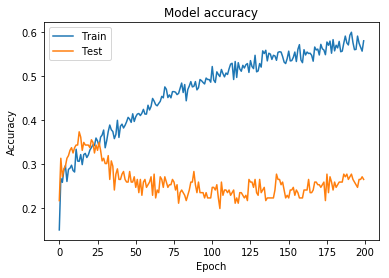

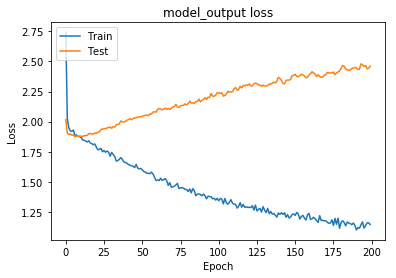

In [40]:
print('Training Accuracy : ' , np.mean(result.history["acc"]))
print('Validation Accuracy : ' , np.mean(result.history["val_acc"]))

predictions = model.predict(x_test)

# matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
# print(matrix)

# Plot training & validation accuracy values
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [32]:

# def throttling(arr, thres):
#     #res = arr.copy()
#     res = np.zeros(len(arr))
#     res[arr >= thres] = int(1)
#     res[arr < thres] = int(0)
#     return res.astype(int)

# predictions = throttling(model.predict(x_test)[:,0], 0.5)


# matrix = confusion_matrix(y_test, predictions)
# print(matrix)

# print(precision_score(y_test, predictions))





In [33]:
# # print(predictions)
# # print(y_test)

# temp = pd.DataFrame(data = predictions)
# temp["test"] = y_test.values
# temp.head()

# temp['delta'] = np.where(temp["test"] == temp[0], 1, 0)    
# temp.head()

In [34]:
# print(temp["delta"].unique())
# print(temp["delta"].value_counts(normalize=True))
# sns.countplot(x="delta", data=temp)
# plt.show()
    